## Basic examples with Python matplotlib package

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### simple line chart

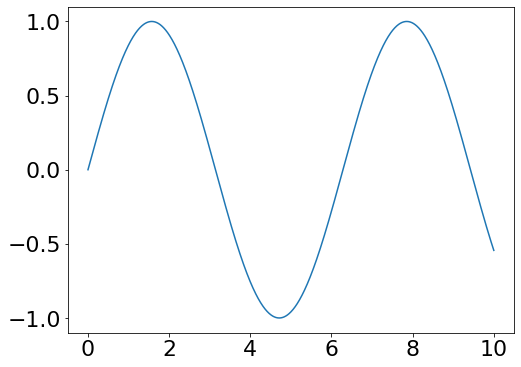

In [3]:
fig = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 22})
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

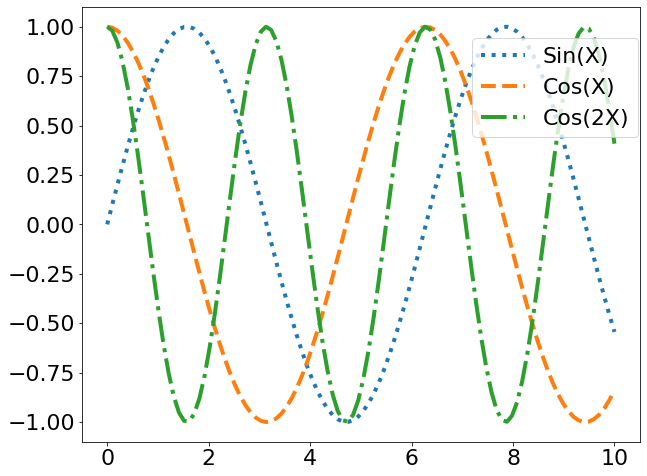

In [4]:
fig = plt.figure(figsize=(10,8))
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x),linestyle=":",linewidth=4, label="Sin(X)")
plt.plot(x,np.cos(x),linestyle="--",linewidth=4, label="Cos(X)")
plt.plot(x,np.cos(2*x),linestyle="-.",linewidth=4, label="Cos(2X)")
plt.legend(loc=[0.7,0.7]);

#### histogram plot

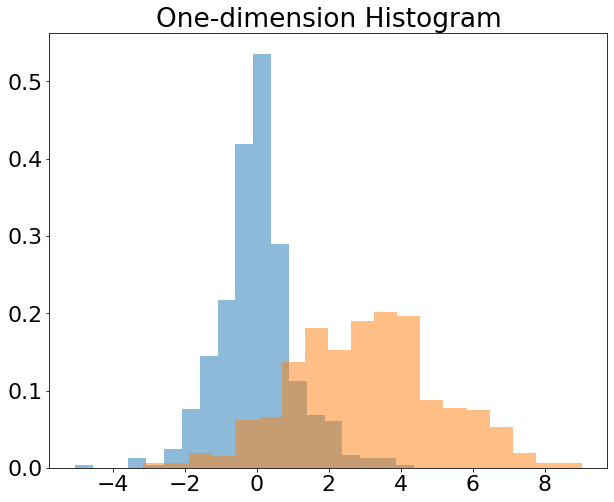

In [5]:
fig = plt.figure(figsize=(10,8))
x1 = np.random.laplace(0, 0.8, 500)
x2 = np.random.normal(3, 2, 500)
plt.hist(x1, alpha=0.5, density=True, bins=np.linspace(min(x1),max(x1),20))
plt.hist(x2, alpha=0.5, density=True, bins=np.linspace(min(x2),max(x2),20))
plt.title("One-dimension Histogram");

#### boxplot

Text(0.5, 1.0, 'Boxplot of 2017 Net Immigration Rate of Texas Counties')

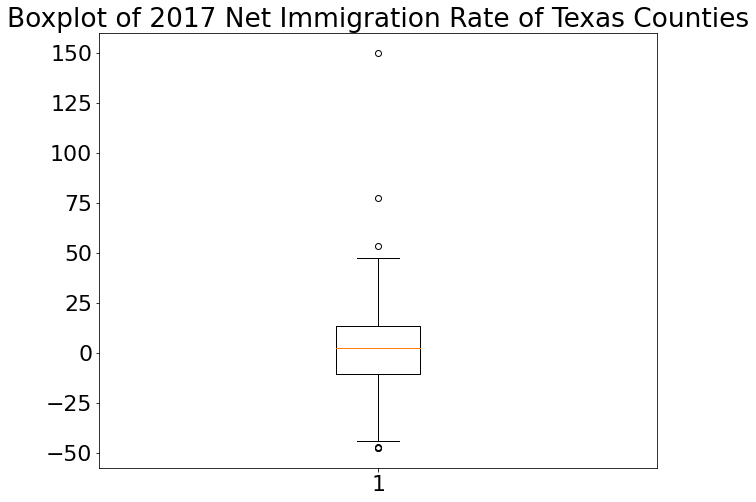

In [8]:
import pandas as pd
fig = plt.figure(figsize=(10,8))
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)
dfTX = df[df["State"]=="TX"].tail(-1)
plt.boxplot(dfTX['R_NET_MIG_2017'])
plt.title("Boxplot of 2017 Net Immigration Rate of Texas Counties")

#### scatter plot

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(dfTX.R_birth_2013,dfTX.R_death_2013,alpha=0.5,label="2013")
plt.scatter(dfTX.R_birth_2017,dfTX.R_death_2017,alpha=0.5,label="2017")
plt.legend()
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates");

#### bar plot

In [ ]:
birthRates = list(filter(lambda x: x.startswith("R_birth"),dfTX.columns))
deathRates = list(filter(lambda x: x.startswith("R_death"),dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))

In [ ]:
dfTX.iloc[0]

In [ ]:
plt.figure(figsize=(10,6))
width=0.4
plt.bar(years-width/2, dfTX.iloc[0][birthRates],
        width=width, label= "birth rate", alpha = 1)
plt.bar(years+width/2, dfTX.iloc[0][deathRates],
        width=width,label="death rate", alpha = 1)
plt.xlabel("years")
plt.ylabel("rate")
plt.legend()
plt.title("Anderson County birth rate and death rate");

#### line chart for the same data

In [ ]:
plt.figure(figsize=(10,6))
width=0.4
plt.plot(years-width/2, dfTX.iloc[0][birthRates], label= "birth rate",linestyle=":",linewidth=4)
plt.plot(years+width/2, dfTX.iloc[0][deathRates], label="death rate",linestyle="--",linewidth=4)
plt.xlabel("years")
plt.ylabel("rate")
plt.legend()
plt.title("Birth Rate and Death Rate of Anderson County");

## Advanced Visualization Customization

build feature mask

In [ ]:
birthRates = list(filter(lambda x: x.startswith("R_birth"),dfTX.columns))
popChanges = list(filter(lambda x: x.startswith("N_POP_CHG"),dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))

In [ ]:
popChanges[1:]

## Axis-sharing and subplots

In [ ]:
figure, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(years, dfTX.iloc[0][birthRates], label= "birth rate",c="red")
ax2 = ax1.twinx()
ax2.plot(years, dfTX.iloc[0][popChanges][1:], label="population change")
ax1.set_xlabel("years")
ax1.set_ylabel("birth rate")
ax2.set_ylabel("population change")
ax1.legend(loc=[0.05,0.8])
ax2.legend(loc=[0.05,0.7])
plt.title("Anderson County birth rate and population change");

In [ ]:
figure, axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(years, dfTX.iloc[0][birthRates], label= "birth rate",c="red")
axes[1].plot(years, dfTX.iloc[0][popChanges][1:], label="population change")
axes[1].set_xlabel("years")
axes[0].set_ylabel("birth rate")
axes[1].set_ylabel("population change")
axes[0].legend()
axes[1].legend()
axes[0].set_title("Anderson County birth rate and population change");

## Scale Change

In [ ]:
coronaCases = pd.read_csv("total_cases_03_15_2020.csv")
from datetime import datetime
coronaCases["date"] = coronaCases["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [ ]:
plt.rcParams.update({'font.size': 18})
figure, axes = plt.subplots(2,1,figsize=(14,12))
axes[0].plot(coronaCases["date"],coronaCases["World"],label="world")
axes[0].plot(coronaCases["date"],coronaCases["United States"],label="united states")
axes[1].plot(coronaCases["date"],coronaCases["World"],label="world")
axes[1].plot(coronaCases["date"],coronaCases["United States"],label="united states")
axes[0].legend()
axes[1].legend()
plt.setp( axes[0].xaxis.get_majorticklabels(), rotation=20 )
plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=20 )
axes[1].set_yscale("log");

## Customize Aesthetics
### Markers

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 22})
dfTemp = dfTX
plt.scatter(dfTemp.R_birth_2013,
            dfTemp.R_death_2013,
            alpha=0.4,
            s = dfTemp.POP_ESTIMATE_2013/1000,
            )
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates in 2013");

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(dfTX.R_birth_2013,
            dfTX.R_death_2013,
            alpha=0.4,
            s = dfTX.POP_ESTIMATE_2013/1000,
            c= dfTX["Rural-urban_Continuum Code_2003"],
            cmap =  'Dark2',
            )
cbar = plt.colorbar()
cbar.ax.set_ylabel('Continuum Code',rotation=90)
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates in 2013");

## Query-oriented statistical plotting

Examples of API usage

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="day", y="total_bill", data=tips)

### Example One: Prepare data to fit plotting function API

In [ ]:
dfTX.head()

In [ ]:
birthRatesDF = dfTX[birthRates].copy()
birthRatesDF["index"] = birthRatesDF.index;
birthRatesDFLong = pd.melt(birthRatesDF,id_vars=["index"],value_vars = birthRatesDF.columns[:-1])
birthRatesDFLong["variable"] = birthRatesDFLong["variable"].apply(lambda x: int(x[-4:]))

In [ ]:
birthRatesDFLong

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="variable", y="value", data=birthRatesDFLong);
plt.xlabel("Year")
plt.ylabel("Birth Rates");

### Example Two: Combine analysis with plain plotting

In [ ]:
dfTX.head()

In [ ]:
g = sns.jointplot("R_NATURAL_INC_2017", "R_birth_2017", data=dfTX, kind="reg",height=10)

## Presentation-ready Plotting Tips
list all styles available

In [ ]:
style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available if style != 'classic')
style_list

Change the styles to `grayscale`.

In [ ]:
with plt.style.context('grayscale'):
    plt.figure(figsize=(12,6));
    g = sns.jointplot("R_NATURAL_INC_2017", "R_birth_2017", data=dfTX, kind="reg",height=10);